# Using deconvolve to deconvolve images

deconvolve can sharpen images using the point spread function derived for Hinode XRT 

In [1]:
from xrtpy.image_correction.deconvolve import deconvolve

Deconvolution is ordinarily used when wanting to remove the blurring around sharp objects or features caused by the telescope's point spread function. Here we show an example of its use for an XRT image taken during the transit of Venus in 2012. This data is included in the test data used by XRTpy.

In [2]:
import pkg_resources

from pathlib import Path
from sunpy.map import Map

directory = pkg_resources.resource_filename("xrtpy", "image_correction/tests/data")
data_file = Path(directory) / "L1_XRT20120605_215839.9.fits"

/tmp/ipykernel_22751/3714256956.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


deconvolve takes a SunPy map as input and returns the deconvolved image and metadata as a SunPy map.

In [3]:
in_map = Map(data_file)
out_map = deconvolve(in_map)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

xrtpy.XRT20170324_151721.0.PSF560.fits:   0%|          | 0.00/33.6M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

xrtpy.XRT20170324_161721.0.PSF1000.fits:   0%|          | 0.00/33.6M [00:00<?, ?B/s]

deconvolve uses the Richardson-Lucy deconvolution algorithm and takes a few optional input parameters including niter (no. of iterations to perform, 5 by default), pdf1keV (to use the point spread function defined at 1.0 keV rather than the default one defined at 560 eV) and verbose (False by default). Above we just used the default settings.

To see the effects of the deconvolution we plot both the input and output images:

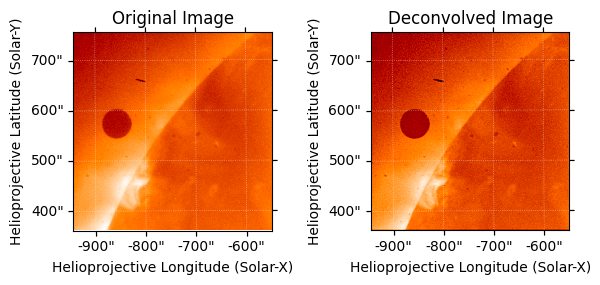

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection=in_map)
in_map.plot(axes=ax1, title="Original Image")
ax2 = fig.add_subplot(1, 2, 2, projection=out_map)
out_map.plot(axes=ax2, title="Deconvolved Image")
fig.subplots_adjust(wspace=0.5)
plt.show()